In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df = df.iloc[:,2:]

In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),df['Purchased'], test_size = 0.3,random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 2), (280,), (120, 2), (120,))

STANDARD SCALER


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler = StandardScaler()

In [ ]:
Scaler.fit(X_train)
# fit the scaler to the train set it will learn the parameters mean and standard deviation

StandardScaler()

In [ ]:
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [ ]:
# You learn from the training dataset and transform your data points using that learning on the training and testing set

In [ ]:
Scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


In [ ]:
X_test_scaled

,Age,EstimatedSalary
0,0.827784,-1.433827
1,2.105076,0.513775
2,-0.940775,-0.784626
3,1.024290,0.749848
4,-0.842522,-1.256772
...,...,...
115,-1.039028,-1.492845
116,-1.137281,-1.581373
117,-0.056496,0.661320
118,0.434771,-0.489535


In [ ]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


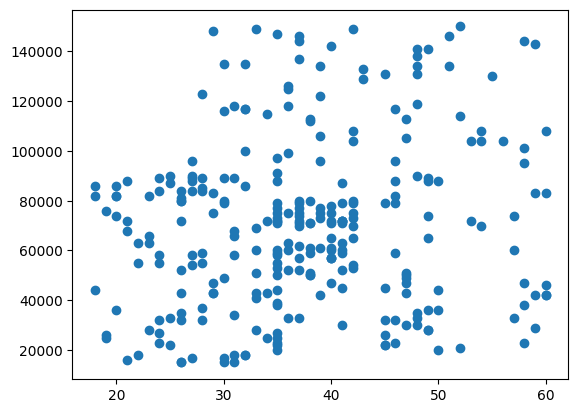

In [ ]:
plt.scatter(X_train['Age'],X_train['EstimatedSalary'])

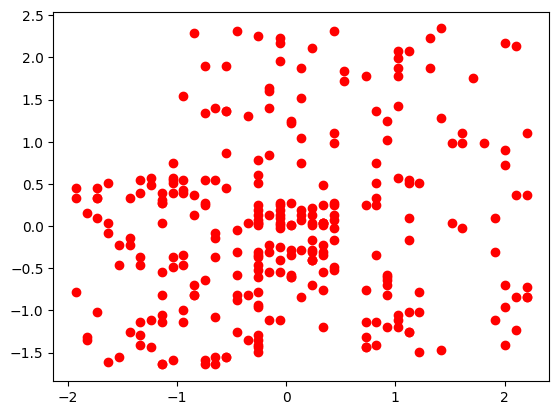

In [ ]:
plt.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')

In [ ]:
# As u can see your data is scaled having features with mean 0 and standard deviation 1

In [ ]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Density'>

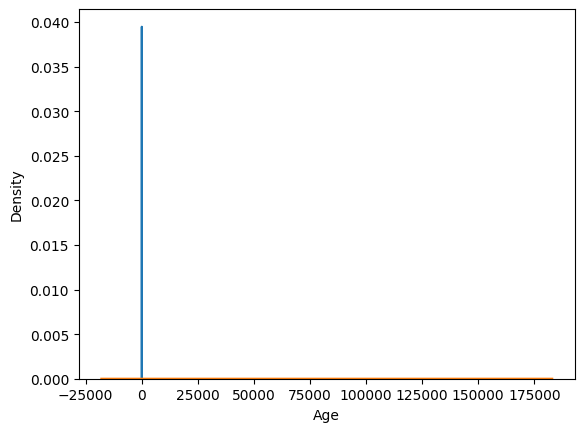

In [ ]:
sns.kdeplot(X_train['Age'])
sns.kdeplot(X_train['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='Density'>

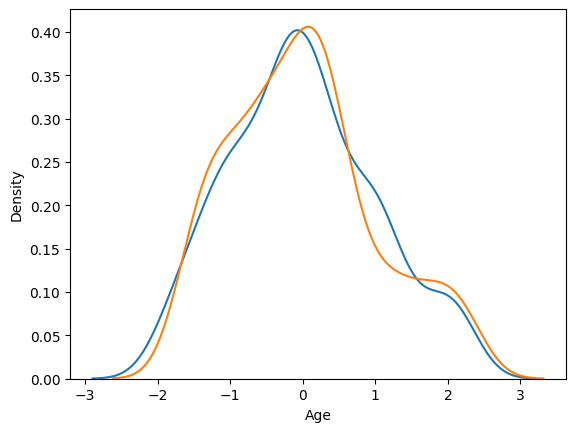

In [ ]:
sns.kdeplot(X_train_scaled['Age'])
sns.kdeplot(X_train_scaled['EstimatedSalary'])


In [ ]:
# As you can see in the first graph your age is one big peak as all the ages are in that range only
# whereas the estimated salary has a flat line both are not comparable whereas
# on the second graph both becomes comparable after scaling

Why Scaling is Important

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
actual_score = accuracy_score(y_test,y_pred)
scaled_score = accuracy_score(y_test,y_pred_scaled)
print(actual_score,scaled_score)

0.85 0.85


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Dt = DecisionTreeClassifier()
Dt_scaled = DecisionTreeClassifier()

In [ ]:
Dt.fit(X_train,y_train)
Dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = Dt.predict(X_test)
y_pred_scaled = Dt_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
actual_score = accuracy_score(y_test,y_pred)
scaled_score = accuracy_score(y_test,y_pred_scaled)

In [ ]:
print(actual_score,scaled_score)

0.85 0.8416666666666667
